In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
url="house_rental_data.txt"

In [24]:
data=pd.read_csv(url)
data.head() 

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [36]:
selected_features = data[['Sqft','Floor','Price']]

# Drop any remaining rows with missing values
selected_features = selected_features.dropna()

In [38]:
# Display the cleaned data
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

In [49]:
scaler
scaled_data

array([[-4.56393027e-01, -1.01489712e+00,  3.70055758e-04],
       [ 7.91797767e-01, -2.42041579e-01,  4.49714146e-01],
       [-5.07434286e-01, -2.42041579e-01, -1.11965967e-01],
       ...,
       [-1.02712711e+00,  1.81890652e+00, -4.77058040e-01],
       [ 2.34984030e-01, -7.57278604e-01,  8.46220726e-02],
       [-1.96546616e-01,  1.55769333e-02, -7.29814091e-01]])

In [56]:
import os
os.environ["MKL_SERVICE_FORCE_INTEL"] = "0"

In [ ]:
# Finding optimal k using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_) 

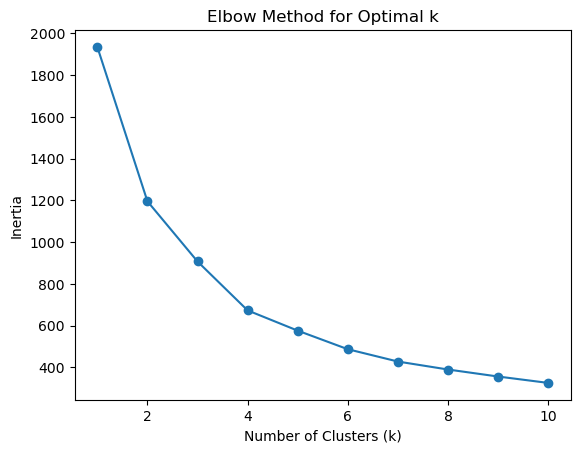

In [51]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [59]:
# Based on the elbow method, choose the optimal k (let's say k=3 for example)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

data['Cluster'] = cluster_labels
data.head()


C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NEHA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
0,1,1177.698,2,7,2,2,2,62000,1
1,2,2134.800,5,7,4,2,2,78000,0
2,3,1138.560,5,7,2,2,1,58000,1
3,4,1458.780,2,7,3,2,2,45000,1
4,5,967.776,11,14,3,2,2,45000,1
